# Clustering del dataset chess_final con Algoritmo K-means

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler #esto es importante!! dado que kmeans es susceptible a diferentes escalas
from sklearn.cluster import KMeans


#Cargando los datos

In [2]:
df=pd.read_csv('/content/chess_final.csv')

In [3]:
df.head(5)

,rank,name,elo,title,country,games,birth_year,continent,age
0,1,Magnus Carlsen,2864,SGM,Norway,3125,1990,ame,34
1,2,Liren Ding,2806,SGM,China,1630,1992,asia,32
2,3,Alireza Firouzja,2793,GM,France,845,2003,ame,21
3,4,Fabiano Caruana,2783,SGM,United States,2622,1992,ame,32
4,5,Levon Aronian,2775,GM,United States,3320,1982,ame,42


In [4]:
#Categorizar por ELO
df['Power'] = pd.cut(df['elo'],
                    bins=3, #parametro para la cantidad de categorias
                    labels=["padawan", "jedai", "senjedai"], #nombres de las categorias
                    include_lowest=True)#, #que tome el valor mas bajo
                    #retbins=True) #que retorne las categorias

In [5]:
df['Power'].value_counts()

,count
Power,
padawan,160
jedai,36
senjedai,4


In [6]:
df_senjedai=df[df.Power == 'senjedai']
df_senjedai

,rank,name,elo,title,country,games,birth_year,continent,age,Power
0,1,Magnus Carlsen,2864,SGM,Norway,3125,1990,ame,34,senjedai
1,2,Liren Ding,2806,SGM,China,1630,1992,asia,32,senjedai
2,3,Alireza Firouzja,2793,GM,France,845,2003,ame,21,senjedai
3,4,Fabiano Caruana,2783,SGM,United States,2622,1992,ame,32,senjedai


In [7]:
df_senjedai = df[df.Power == 'senjedai']
df_senjedai

,rank,name,elo,title,country,games,birth_year,continent,age,Power
0,1,Magnus Carlsen,2864,SGM,Norway,3125,1990,ame,34,senjedai
1,2,Liren Ding,2806,SGM,China,1630,1992,asia,32,senjedai
2,3,Alireza Firouzja,2793,GM,France,845,2003,ame,21,senjedai
3,4,Fabiano Caruana,2783,SGM,United States,2622,1992,ame,32,senjedai


# Analizando la data

In [8]:
df.describe()

,rank,elo,games,birth_year,age
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,2662.385000,1394.185000,1989.395000,34.605000
std,57.879185,47.208793,776.177129,9.057548,9.057548
min,1.000000,2608.000000,277.000000,1965.000000,18.000000
25%,50.750000,2623.750000,785.000000,1984.000000,28.000000
50%,100.500000,2650.500000,1211.000000,1990.000000,34.000000
75%,150.250000,2686.000000,1784.000000,1996.000000,40.000000
max,200.000000,2864.000000,3913.000000,2006.000000,59.000000


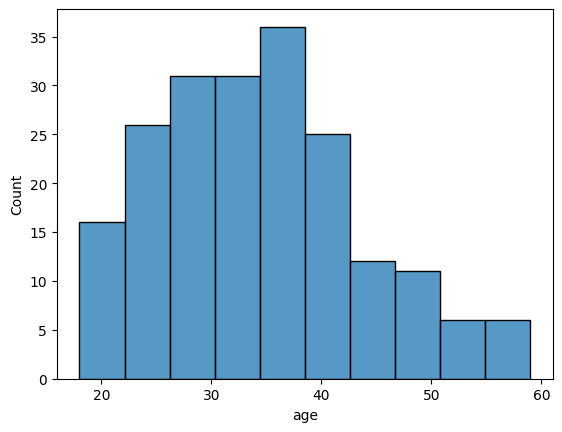

In [9]:
sns.histplot(df['age'])
plt.show()

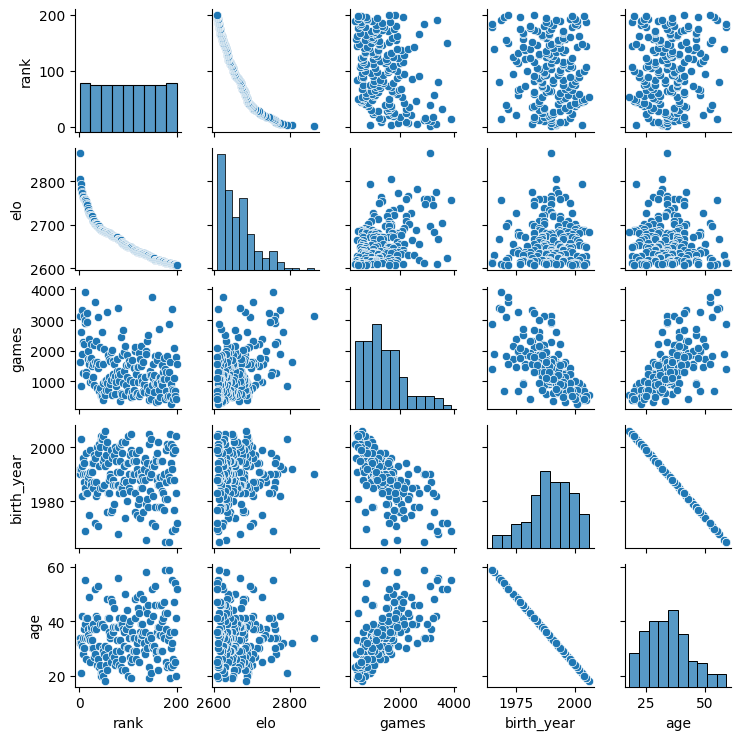

In [10]:
sns.pairplot(df, height=1.5)
plt.show()

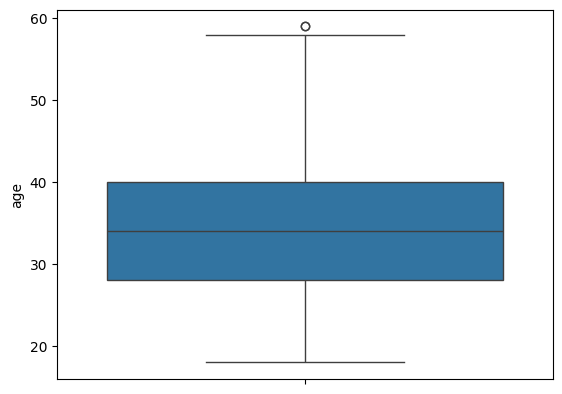

In [11]:
sns.boxplot(df['age'])
plt.show()

In [12]:
df_veter=df[df['age']>50]
df_veter

,rank,name,elo,title,country,games,birth_year,continent,age,Power
12,13,Viswanathan Anand,2756,SGM,India,3913,1969,asia,55,jedai
31,32,Alexei Shirov,2704,SGM,Spain,3578,1972,ame,52,jedai
38,39,Michael Adams,2696,GM,United Kingdom,3102,1971,ame,53,jedai
78,79,Boris Gelfand,2668,GM,Israel,3394,1968,asia,56,padawan
137,138,Evgeny Bareev,2631,GM,Canada,1885,1966,ame,58,padawan
149,150,Loek Van Wely,2624,GM,Netherlands,3749,1972,ame,52,padawan
154,155,Vladimir Akopian,2620,GM,United States,1830,1971,ame,53,padawan
176,177,Miguel Illescas Cordoba,2614,GM,Spain,1402,1965,ame,59,padawan
183,184,Nigel D Short,2612,SGM,United Kingdom,2875,1965,ame,59,padawan
189,190,Aleksey Dreev,2610,GM,Russian Federation,3360,1969,ame,55,padawan


#Preprocesamiento con MinMaxScaler

In [13]:
# Seleccionar las variables
X = df[['elo', 'age']]

# Escalar las variables
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
type(X_scaled)

numpy.ndarray

# Determinar el número óptimo de clusters (k) - Método del codo

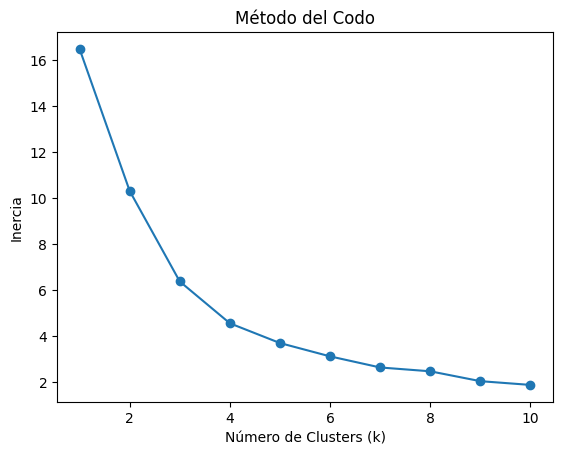

In [15]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()
# Observando el gráfico para identificar el 'codo', podria ser 3 o 4

#Entrenamiento del modelo con Kmeans

In [16]:
# Aplicar K-means (asumiendo k=4 según el método del codo)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_


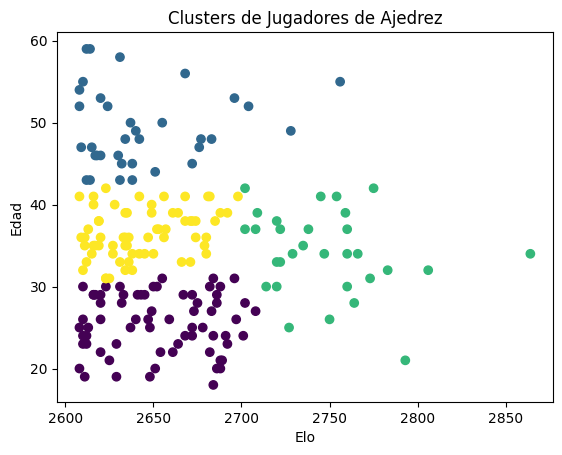

In [17]:
# Visualizar los clusters
plt.scatter(df['elo'], df['age'], c=df['cluster'])
plt.title('Clusters de Jugadores de Ajedrez')
plt.xlabel('Elo')
plt.ylabel('Edad')
plt.show()

#Análisis de los resultados

Uniendo la data y métricas

In [18]:
# Analizar los clusters (ejemplo: media de Elo por cluster)
print(df.groupby('cluster')['elo'].mean())

cluster
0    2652.942029
1    2643.428571
2    2747.566667
3    2643.590909
Name: elo, dtype: float64


#Gráfica de resultados | experimentando con plotly

In [20]:
#!pip install plotly==5.15.0


In [25]:
import plotly.express as px

df['cluster'] = df['cluster'].astype(str)  # Convertir a tipo str

fig=px.scatter(df,x = 'elo', y ='age',color='cluster',
               color_discrete_sequence=['red', 'green', 'blue', 'yellow'])  # Especificar colores)
fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



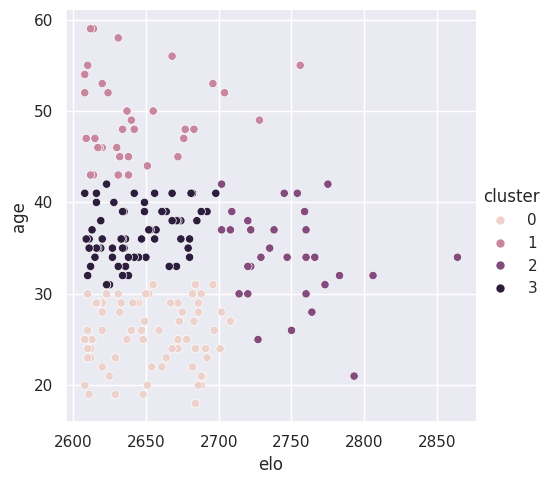

In [23]:
sns.set(style='darkgrid')
sns.relplot(data= df, x = 'elo', y ='age',hue='cluster')
plt.show()